HW6
Dawei He (dh3027)

In [1]:
x1 = [1,1,0,0,1,0,0,-1]
x2 = [-1,0,0,-1,1,1,0,0]
x3 = [-1,1,-1,1,1,0,1,1]
y = [0,0,0,0,1,1,1,1]
# sample = {'x1':x1,'x2':x2,'x3':x3,'y':y}

Problem 1

(a)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

In [68]:
theta = np.array([y.count(0)/len(y),y.count(1)/len(y)]) # P(Y)=N(Y=y)/N(sample)
idx0=[i for i in range(len(y)) if y[i]==0] # index of y=0
idx1=[i for i in range(len(y)) if y[i]==1] # index of y=1

In [69]:
model=np.array([[[len([x[i] for i in idx if x[i]==j])/len(idx) for j in [-1,0,1]] for idx in [idx0,idx1]] for x in [x1,x2,x3]])

In [70]:
model

array([[[0.  , 0.5 , 0.5 ],
        [0.25, 0.5 , 0.25]],

       [[0.5 , 0.5 , 0.  ],
        [0.  , 0.5 , 0.5 ]],

       [[0.5 , 0.  , 0.5 ],
        [0.  , 0.25, 0.75]]])

N(y=0,x1=-1)/N(y=0)=0
N(y=0,x2=1)/N(y=0)=0
N(y=1,x2=-1)/N(y=1)=0
N(y=0,x3=0)/N(y=0)=0
N(y=1,x3=-1)/N(y=1)=0


(c)


In [71]:
def bayes_predict(x1_in,x2_in,x3_in,model_in):
    inputs = [x1_in,x2_in,x3_in]
    result = theta
    for i in range(model_in.shape[0]):
        result = np.multiply(result,model_in[i][:,inputs[i]+1])

    return result

In [72]:
results = []
for i in range(len(x1)):
    results.append(bayes_predict(x1[i],x2[i],x3[i],model).tolist())

In [73]:
results

[[0.0625, 0.0],
 [0.0625, 0.046875],
 [0.0625, 0.0],
 [0.0625, 0.0],
 [0.0, 0.046875],
 [0.0, 0.03125],
 [0.0625, 0.09375],
 [0.0, 0.046875]]

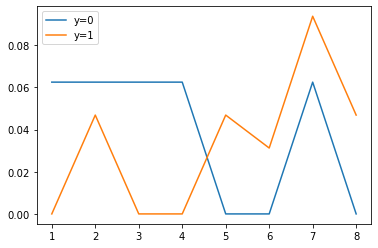

In [74]:
plt.plot([x for x in range(1,9)],[x[0] for x in results], label='y=0')
plt.plot([x for x in range(1,9)],[x[1] for x in results], label='y=1')
plt.legend()

(d)

In [75]:
a=1
model_laplace=np.array([[[(len([x[i] for i in idx if x[i]==j])+a)/(len(idx)+a*len(set(y))) for j in [-1,0,1]] for idx in [idx0,idx1]] for x in [x1,x2,x3]])

In [76]:
results = []
for i in range(len(x1)):
    results.append(bayes_predict(x1[i],x2[i],x3[i],model_laplace).tolist())

In [77]:
results

[[0.0625, 0.004629629629629629],
 [0.0625, 0.05555555555555555],
 [0.0625, 0.020833333333333332],
 [0.0625, 0.027777777777777776],
 [0.020833333333333332, 0.05555555555555555],
 [0.006944444444444444, 0.041666666666666664],
 [0.0625, 0.08333333333333333],
 [0.020833333333333332, 0.05555555555555555]]

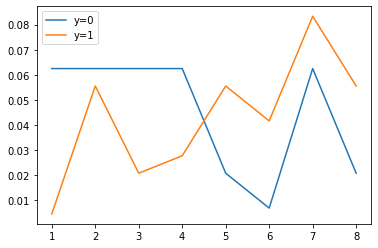

In [78]:
plt.plot([x for x in range(1,9)],[x[0] for x in results], label='y=0')
plt.plot([x for x in range(1,9)],[x[1] for x in results], label='y=1')
plt.legend()

Problem 3

(a)

In [97]:
df = pd.DataFrame(dict(x1=x1,x2=x2,x3=x3,y=y))

In [99]:
fig = plt.figure()
fig = px.scatter_3d(df, x='x1', y='x2', z='x3',
              color='y')
fig.show()

<Figure size 432x288 with 0 Axes>

(b)

In [194]:
def model1(a):
    w1 = np.array([0,0,0,0])
    samples = [x for x in zip(x1,x2,x3)]
    converged = [False]*len(samples)
    w1_hist=[]
    w1_hist.append(w1)
    while not all(converged):
        for i in range(len(samples)):
            x = np.insert(np.array(samples[i]),0,1)
            hw = 0 if np.sum(np.multiply(w1,x)) <= 0 else 1
            w1 = w1 + a*(y[i]-hw)*x
            w1_hist.append(w1)

        for i in range(len(samples)):
            x = np.insert(np.array(samples[i]),0,1)
            hw = 0 if np.sum(np.multiply(w1,x)) <= 0 else 1
            converged[i] = True if hw==y[i] else False
    return w1,w1_hist

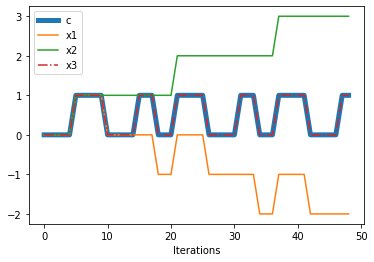

In [195]:
w1,w1_hist = model1(1)
plt.plot([x[0] for x in w1_hist],linewidth='5', label='c')
plt.plot([x[1] for x in w1_hist], label='x1')
plt.plot([x[2] for x in w1_hist], label='x2')
plt.plot([x[3] for x in w1_hist],linestyle='-.', label='x3')
plt.xlabel('Iterations')
plt.legend()

In [178]:
def model2(a):
    w2 = np.array([0,0,0,0])
    samples = [x for x in zip(x1,x2,x3)]
    converged = [False]*len(samples)
    w2_hist=[]
    w2_hist.append(w2)
    while not all(converged):
        for i in range(len(samples)):
            x = np.insert(np.array(samples[i]),0,1)
            hw = 0 if np.sum(np.multiply(w2,x)) < 0 else 1
            w2 = w2 + a*(y[i]-hw)*x
            w2_hist.append(w2)

        for i in range(len(samples)):
            x = np.insert(np.array(samples[i]),0,1)
            hw = 0 if np.sum(np.multiply(w2,x)) < 0 else 1
            converged[i] = True if hw==y[i] else False
    return w2, w2_hist

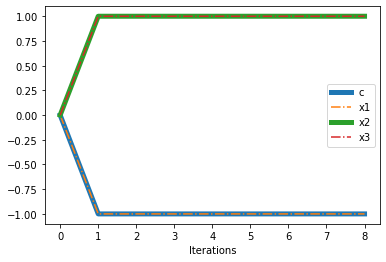

In [180]:
w2,w2_hist = model2(1)
plt.plot([x[0] for x in w2_hist],linewidth='5', label='c')
plt.plot([x[1] for x in w2_hist],linestyle='-.', label='x1')
plt.plot([x[2] for x in w2_hist],linewidth='5', label='x2')
plt.plot([x[3] for x in w2_hist], linestyle='-.',label='x3')
plt.xlabel('Iterations')
plt.legend()

(c)

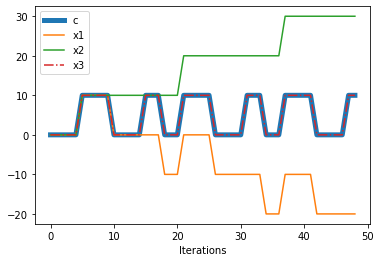

In [201]:
w1,w1_hist = model1(10)
plt.plot([x[0] for x in w1_hist],linewidth='5', label='c')
plt.plot([x[1] for x in w1_hist], label='x1')
plt.plot([x[2] for x in w1_hist], label='x2')
plt.plot([x[3] for x in w1_hist],linestyle='-.', label='x3')
plt.xlabel('Iterations')
plt.legend()

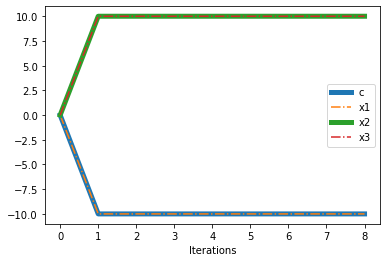

In [207]:
w2,w2_hist = model2(10)
plt.plot([x[0] for x in w2_hist],linewidth='5', label='c')
plt.plot([x[1] for x in w2_hist],linestyle='-.', label='x1')
plt.plot([x[2] for x in w2_hist],linewidth='5', label='x2')
plt.plot([x[3] for x in w2_hist], linestyle='-.',label='x3')
plt.xlabel('Iterations')
plt.legend()

(d)

In [208]:
def sigmoid(x):

    z = np.exp(-x)
    sig = 1 / (1 + z)

    return sig

In [209]:
w1,_=model1(1)
w2,_=model2(1)
results1=[]
results2=[]
samples = [x for x in zip(x1,x2,x3)]

for i in range(len(samples)):
    x = np.insert(np.array(samples[i]),0,1)
    results1.append(sigmoid(np.sum(np.multiply(w1,x))))
    results2.append(sigmoid(np.sum(np.multiply(w2,x))))


Text(0.5, 0, 'Sample')

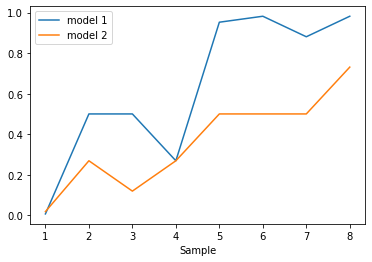

In [218]:
plt.plot([x for x in range(1,len(results1)+1)],results1,label='model 1')
plt.plot([x for x in range(1,len(results1)+1)],results2,label='model 2')
plt.legend()
plt.xlabel('Sample')

In [214]:
results1

[0.0066928509242848554,
 0.5,
 0.5,
 0.2689414213699951,
 0.9525741268224334,
 0.9820137900379085,
 0.8807970779778823,
 0.9820137900379085]

In [215]:
results2

[0.01798620996209156,
 0.2689414213699951,
 0.11920292202211755,
 0.2689414213699951,
 0.5,
 0.5,
 0.5,
 0.7310585786300049]

Problem 4

(c)

In [3]:
def sigmoid(x):
    z = np.exp(-x)
    sig = 1 / (1 + z)
    return sig

def sigmoid_d(x):
    return x * (1 - x)

In [55]:
def nn(a, activation, activation_d,threshold):
    w1 = np.zeros(shape=(2,4))
    w2 = np.zeros(shape=(3))
    # loss = float('inf')
    loss_hist=[]
    samples = [x for x in zip(x1,x2,x3)]
    while True:
        for i in range(len(samples)-1,-1,-1):

            x = np.insert(np.array(samples[i]),0,1)
            hidden = activation(w1@x)
            in2=np.insert(hidden,0,1)
            y_hat = activation(w2@in2)
            # print(y_hat)
            loss = 0.5*(y[i]-y_hat)**2
            loss_hist.append(loss)
            dw2=(y_hat-y[i])*activation_d(y_hat)*in2
            dw1 = np.expand_dims((y_hat-y[i])*activation_d(y_hat)*w2[1:]*activation_d(hidden),axis=1)*x
            w1=w1-a*dw1
            w2=w2-a*dw2

        check_loss=[]
        for i in range(len(samples)):
            x = np.insert(np.array(samples[i]),0,1)
            hidden = activation(w1@x.T)
            in2=np.insert(hidden,0,1)
            y_hat = activation(w2@(in2).T)
            loss = 0.5*(y[i]-y_hat)**2
            check_loss.append(loss)
        print(check_loss)
        if all(np.array(check_loss)<threshold):
            return w1,w2,loss_hist

    # return w1,w2,loss_hist

In [41]:
_,_,loss_hist=nn(a=1,activation=sigmoid,activation_d=sigmoid_d,threshold=0.001)

Text(0, 0.5, 'Loss')

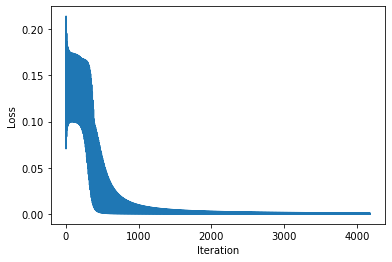

In [42]:
plt.plot(loss_hist)
plt.xlabel('Iteration')
plt.ylabel('Loss')

(d)

Text(0.5, 1.0, 'a=0.1')

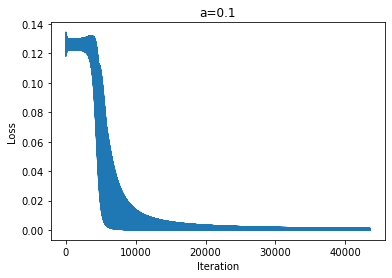

In [43]:
w1_small,w2_small,loss_hist_small=nn(a=0.1,activation=sigmoid,activation_d=sigmoid_d,threshold=0.001)
plt.plot(loss_hist_small)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('a=0.1')

In [44]:
w1_small,w2_small

(array([[-0.0106906 ,  3.05963708, -3.47008551, -1.79713168],
        [-0.0106906 ,  3.05963708, -3.47008551, -1.79713168]]),
 array([ 4.46406161, -4.97669244, -4.97669244]))

Text(0.5, 1.0, 'a=50')

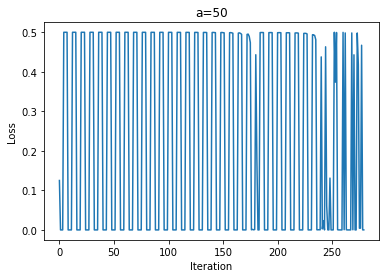

In [45]:
w1_large,w2_large,loss_hist_large=nn(a=50,activation=sigmoid,activation_d=sigmoid_d,threshold=0.001)
plt.plot(loss_hist_large)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('a=50')

In [47]:
w1_large,w2_large

(array([[-2.69542992, -9.18086117, 10.13714819,  3.62093425],
        [-2.69542992, -9.18086117, 10.13714819,  3.62093425]]),
 array([-4.25017621,  7.32170114,  7.32170114]))

(e)

In [75]:
def nn_e(a, activation, activation_d,threshold):
    w1 = np.random.rand(2,4)
    w2 = np.random.rand(3)
    # loss = float('inf')
    loss_hist=[]
    samples = [x for x in zip(x1,x2,x3)]
    while True:
        for i in range(len(samples)):

            x = np.insert(np.array(samples[i]),0,1)
            hidden = activation(w1@x)
            in2=np.insert(hidden,0,1)
            y_hat = activation(w2@in2)
            # print(y_hat)
            loss = 0.5*(y[i]-y_hat)**2
            loss_hist.append(loss)
            dw2=(y_hat-y[i])*activation_d(y_hat)*in2
            dw1 = np.expand_dims((y_hat-y[i])*activation_d(y_hat)*w2[1:]*activation_d(hidden),axis=1)*x
            w1=w1-a*dw1
            w2=w2-a*dw2

        check_loss=[]
        for i in range(len(samples)):
            x = np.insert(np.array(samples[i]),0,1)
            hidden = activation(w1@x.T)
            in2=np.insert(hidden,0,1)
            y_hat = activation(w2@(in2).T)
            loss = 0.5*(y[i]-y_hat)**2
            check_loss.append(loss)
        # print(check_loss)
        if all(np.array(check_loss)<threshold):
            return w1,w2,loss_hist


In [77]:
def tanh(x):
    t=np.tanh(x)
    return t

def tanh_d(x):
    dt=1-x**2
    return dt

def softplus(x):
    return np.log(1 + np.exp(-np.abs(x))) + np.maximum(x,0)

def softplus_d(x):
    return np.divide(1.,1.+np.exp(-x))

def relu(x):
    return np.maximum(x, 0)

def relu_d(x):
    return np.greater(x, 0).astype(int)



Text(0.5, 1.0, 'tanh')

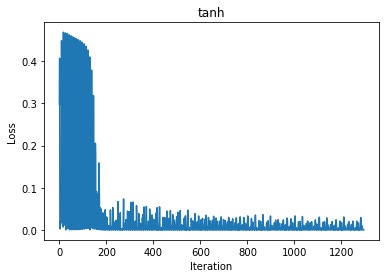

In [85]:
_,_,loss_hist_tanh= nn_e(a=1,activation=tanh,activation_d=tanh_d,threshold=0.001)
plt.plot(loss_hist_tanh)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('tanh')

Text(0.5, 1.0, 'Softplus')

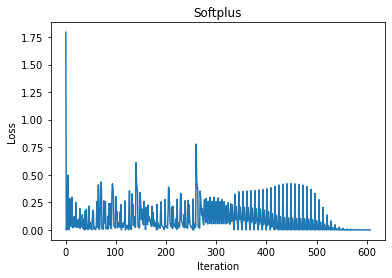

In [86]:
_,_,loss_hist_softplus= nn_e(a=1,activation=softplus,activation_d=softplus_d,threshold=0.001)
plt.plot(loss_hist_softplus)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Softplus')

Text(0.5, 1.0, 'Relu')

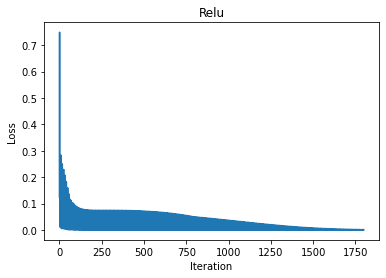

In [99]:
_,_,loss_hist_relu= nn_e(a=0.1,activation=relu,activation_d=relu_d,threshold=0.001)
plt.plot(loss_hist_relu)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Relu')